<a href="https://colab.research.google.com/github/Digvijayapatro/unsupervised_learning/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
#import library packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
# Load the iris dataset
iris_data = pd.read_csv('/content/Iris Dataset.csv')

In [201]:
# view the data set
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [202]:
# view the no of rows and columns in data set
iris_data.shape

(150, 6)

In [203]:
# describe the data set
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [204]:
# Separate the Species column for future comparison
species = iris_data['Species']
iris_data = iris_data.drop('Species', axis=1)

In [205]:
#  Normalize the data
def normalize_data(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [206]:
# Compute the covariance matrix
def compute_covariance_matrix(data):
    covariance_matrix = np.cov(data, rowvar=False)
    return covariance_matrix

In [207]:

# Compute eigenvalues and eigenvectors
def compute_eigenvectors(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    return eigenvalues, eigenvectors

In [208]:
# Sort eigenvalues and corresponding eigenvectors in descending order
def sort_eigenvalues(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

In [209]:

# Project the data onto the eigenvectors
def project_data(data, eigenvectors, k):
    projection_matrix = eigenvectors[:, :k]
    projected_data = np.dot(data, projection_matrix)
    return projected_data

In [210]:
# Reconstruct the data from the projected data
def reconstruct_data(projected_data, eigenvectors):
    reconstruction_matrix = eigenvectors[:, :projected_data.shape[1]]
    reconstructed_data = np.dot(projected_data, reconstruction_matrix.T)
    return reconstructed_data

In [211]:
# Calculate the explained variance ratio
def explained_variance_ratio(sorted_eigenvalues):
    total_variance = np.sum(sorted_eigenvalues)
    explained_variance = sorted_eigenvalues / total_variance
    return explained_variance

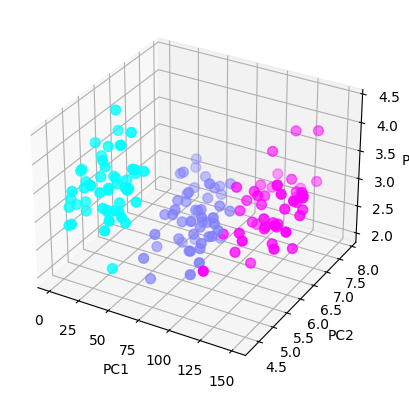

In [212]:
def plot_data(data, species):
    # Map species labels to numeric values
    species_mapping = {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    }
    species_numeric = [species_mapping[s] for s in species]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=species_numeric, cmap='cool', s=50)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()

plot_data(data, species)

In [213]:
#  Visualize accuracy using a bar plot
def visualize_accuracy(explained_var):
    components = range(1, len(explained_var) + 1)

    plt.figure()
    plt.bar(components, explained_var, align='center', color='green', alpha=0.7)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio for each Principal Component')
    plt.xticks(components)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [214]:
#  Calculate accuracy
def calculate_accuracy(original_data, reconstructed_data):
    mse = np.mean((original_data - reconstructed_data) ** 2)
    accuracy = 1 - mse / np.var(original_data)
    return accuracy

In [215]:
# Perform PCA
normalized_data = normalize_data(iris_data)
covariance_matrix = compute_covariance_matrix(normalized_data)
eigenvalues, eigenvectors = compute_eigenvectors(covariance_matrix)
sorted_eigenvalues, sorted_eigenvectors = sort_eigenvalues(eigenvalues, eigenvectors)
projected_data = project_data(normalized_data, sorted_eigenvectors, 3)
reconstructed_data = reconstruct_data(projected_data, sorted_eigenvectors)
explained_var = explained_variance_ratio(sorted_eigenvalues)

In [216]:
# Calculate accuracy
accuracy = calculate_accuracy(normalized_data, reconstructed_data)
print("Accuracy:", accuracy)

Accuracy: Id               0.972349
SepalLengthCm    0.983768
SepalWidthCm     0.998887
PetalLengthCm    0.979538
PetalWidthCm     0.956619
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


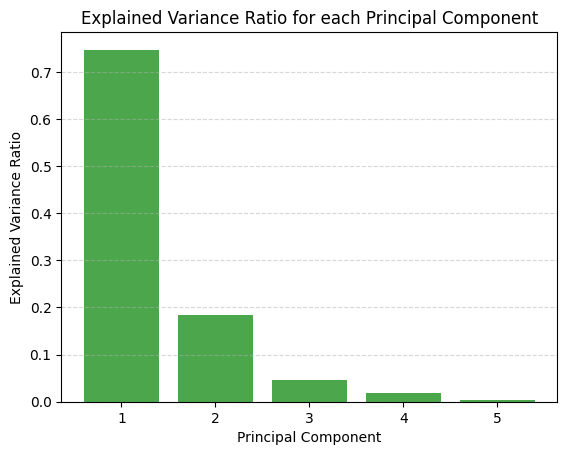

In [217]:
# Visualize accuracy using a bar plot
visualize_accuracy(explained_var)

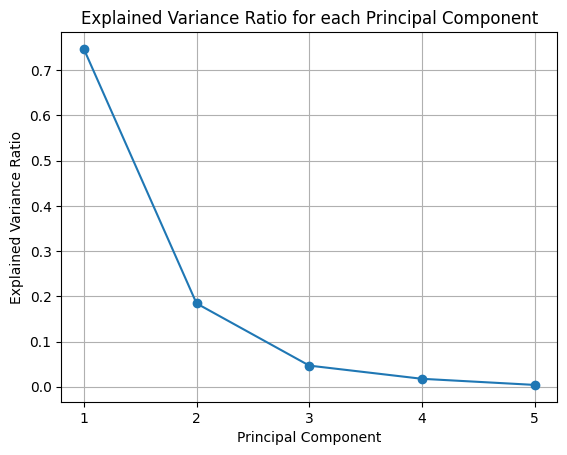

In [218]:
#  Visualize accuracy using a line plot
def visualize_accuracy(explained_var):
    components = range(1, len(explained_var) + 1)

    plt.figure()
    plt.plot(components, explained_var, marker='o')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio for each Principal Component')
    plt.xticks(components)
    plt.grid(True)
    plt.show()

visualize_accuracy(explained_var)